# COGS 108 - Final Project 

# Overview

The question our project is addressing is whether the population of a state affects the amount of medicare one receives for a particular illness. This topic is of great importance because medicare provides health insurance to seniors, the disabled and those who are unable to afford it. Our project aims to find a relation between population and Medicare to tell if the state you live in has any disadvantage when it comes to Medicare, and whether it differs for different illnesses.

# Names

- Samvit Sutodiya
- Arya Nair
- Linwei Lu
- Jenny Zhang

# Group Members IDs

- A92122472
- A14688056
- A13996537
- A14854801

# Research Question

The question our project seeks an answer to is whether the population of a state affect the amount of medicare one receives for a particular illness. We analyze state populations and average medicare coverage for specific diseases in each state. We compare the amount covered to the amount paid and see if population has any effect on that ratio.

## Background and Prior Work

Medicare is a national health insurance program that covers health care costs for adults over the age of 65 and younger people with specific disabilities. Medicare has four parts that help cover certain services such as Hospital Insurance, Medical Insurance, prescription drug coverage and a Medicare Advantage which is an all in one plan. The main benefit of Medicare is that it provides health coverage regardless of the person’s income, thus benefiting people with low income by helping those who are unable to afford medical insurance (“Acute Inpatient PPS”, 2019).

But unfortunately this isn’t always the case. Studies such as ‘Medicare Utilization in the United States: PSRO and Regional Impacts’ by DL Rothberg, J Pinto and PM Gertman show how geographical factors affect medicare in the United States. Factors such as demographic and socio-economics play a role in determining the amount of medicare one receives. In this project we explore how population plays a role in determining the amount of medicare one receives. 

References (include links):

- “Acute Inpatient PPS”, 2019 (https://www.cms.gov/Medicare/Medicare-Fee-for-Service-Payment/AcuteInpatientPPS/index.html?redirect=/AcuteInpatientPPS/)
- ‘Medicare Utilization in the United States: PSRO and Regional Impacts’ by DL Rothberg, J Pinto and PM Gertman (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1072167/)

# Hypothesis


The question our project asks is whether the amount of medicare one receives for a specific illness, differs from state to state based on the state’s population. The amount of medicare is calculated as the ratio of amount covered by medicare to the amount paid by patients.

The hypothesis we have is that the greater the population of the state, the more medicare one receives on average. Due to the higher populations, more people would be paying more premiums and drive up the coverage provided by health insurance companies. This might result in a higher coverage for people in these states. 

# Datasets- Description

In this project, we utilize three Datasets: one relating to the medical insurance and two involving the state population details. Given on these three data sets, we would able to found out "whether the amount of medicare one receives for a specific illness, differs from state to state based on the state’s population"(project proposal). 

First dataset we will involve is the "Inpatient Prospective Payment System (IPPS) Provider Summary for the Top 100 Diagnosis-Related Groups (DRG) - FY2011". The Inpatient Prospective Payment System(MIPPS) is a payment system for inpatient care and stays covered by medical insurance (Medicare). The data table includes Total Discharges, Average Covered Discharges, Average Total Payments, and Average Medicare Payments which help extract the amount of Medicare provided for a specific illness. what's more, the data set provides over 3,000 u.s hospitals spefical charges information, and top 100 most frequently billed discharges involving with the MIPPS payments. In the columns of the dataset, it involves DRG to represents over "7 million discharges or 60 percent of totalMedicare IPPS discharges". It classifies the system grouping similar clinical conditions and procedures and the provider city. Hence, the said data tables help us to answer the question of how much the patients pay for the different illness in each state.

- DataSet Name: "Inpatient Prospective Payment System (IPPS) Provider Summary for the Top 100 Diagnosis-Related Groups (DRG) - FY2011".
- Link to the dataset: https://data.cms.gov/Medicare-Inpatient/Inpatient-Prospective-Payment-System-IPPS-Provider/97k6-zzx3
- Data Provided by CMs, DataSet Owner OEDA
- Number of observations: 163065

Second dataset we included is the "National, State, and Puerto Rico Commonwealth Totals Datasets: Population, population change, and estimated components of population change: April 1, 2010 to July 1, 2018". It is provided by United States Census Bureau. This dataset contains data from the 2010 US Census, as well as estimated yearly population, population change, and estimated components of population change of each state from 2010-2018.In the columns of table, it includes Name of the Region, Popluation Estimate ,National Population Change, Birth Rate, Death Rate, which provides the conprehensive information of the population changes in demestic and national scales. 

- DataSet Name:"National, State, and Puerto Rico Commonwealth Totals Datasets: Population, population change, and estimated components of population change: April 1, 2010 to July 1, 2018". 
- Link to the dataset: https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html 
- Data Provided by United States Census Bureau
- Number of observations: 57


The third one is "CSV of States and State Abbreviations", provided by fronz.net weblog. This dataset contains all the US states and their abbreviation.Unlike the said two datasets, this dataset table is straightforward: there are only two columnes: State name and Abbreviation. This dataset  increase the efficency to recognize, categorize and label the geographic information.

- DataSet Name: "CSV of States and State Abbreviations".
- Link to the dataset: http://www.fonz.net/blog/archives/2008/04/06/csv-of-states-and-state-abbreviations/
- Number of observations: 51

In conclusion, we plan to combine these three databases by adding the populations for each provider state to analyze whether the population of a state affects the amount of Medicare one receives. Since the first dataset uses state abbreviations while the census uses their names, we will be using a third dataset to match abbreviations to state names. 

# Setup

In [1]:
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (17, 7) 
import seaborn as sns
sns.set(style='white', font_scale=2) 
from scipy.stats import uniform, norm, bernoulli, poisson, ttest_ind

# Data Cleaning

First, we will read in the dataset.

In [2]:
dataset = 'Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_' \
            'for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv'
df = pd.read_csv(dataset)

Next, we will drop the columns that we won't be using in our analysis, which are all the provider-related fields (aside from the state) and the hospital region. Some of the column names have extra spaces around them, so we will rename those columns.

In [3]:
df.drop(columns = ['Provider Id', 'Provider Name', 'Provider Street Address', 
                   'Provider City', 'Provider Zip Code',
                   'Hospital Referral Region Description'],
                 inplace = True)
columns = ['DRG', 'State', 'Discharges', 'Avg Covered Charges',
           'Avg Total Payments', 'Avg Medicare Payments']
df.columns = columns

Next, we need to combine all the data for each state. We will be analyzing different illnesses/conditions separately, so each state will have one row for each illness containing the Average Covered Charges (the provider's average charge for services) and Average Medicare Payments (the amount covered by Medicare, not including co-payment and deductibles). We will keep the Total Payments column as well, in case we want to analyze it separately later. Using the number of total discharges from each hospital, we will calculate each of these average amounts for each illness within each state.

Using these average values, we will create two new dataframes to perform analysis on. The first dataframe will contain the average amounts for each state and condition. The second dataframe will only contain the average values for each state, for the purpose of simplifying our overall analysis.

In [4]:
# construct the rows of the first dataframe, separated by condition and state
rows_condition = list()
for name, group in df.groupby(['State', 'DRG']):
    total_discharges = group['Discharges'].sum()
    avg_charges = (group['Avg Covered Charges'] * group['Discharges']).sum()
    / total_discharges
    avg_total = (group['Avg Total Payments'] * group['Discharges']).sum()
    / total_discharges
    avg_medicare = (group['Avg Medicare Payments'] * group['Discharges']).sum()
    / total_discharges
    rows_condition.append([name[1], name[0], total_discharges, avg_charges,
                           avg_total, avg_medicare])

# construct the rows of the second dataframe, separated by state
rows_state = list()
for name, group in df.groupby(['State']):
    total_discharges = group['Discharges'].sum()
    avg_charges = (group['Avg Covered Charges'] * group['Discharges']).sum() 
    / total_discharges
    avg_total = (group['Avg Total Payments'] * group['Discharges']).sum()
    / total_discharges
    avg_medicare = (group['Avg Medicare Payments'] * group['Discharges']).sum()
    / total_discharges
    rows_state.append([name, total_discharges, avg_charges, avg_total,
                       avg_medicare])
    
df_condition = pd.DataFrame(rows_condition, columns = columns)
df_state = pd.DataFrame(rows_state, columns = ['State', 'Discharges',
                                               'Avg Covered Charges',
                                               'Avg Total Payments',
                                               'Avg Medicare Payments'])

Our df_condition dataframe currently contains data for the top 100 Diagnosis-Related Groups (DRG). To simplify our analysis, we will narrow down our data to the top 10 DRG, based on number of total discharges.

In [5]:
rows_DRG = list()
for name, group in df.groupby(['DRG']):
    rows_DRG.append([name, group['Discharges'].sum()])
df_DRG = pd.DataFrame(rows_DRG, columns = ['DRG', 'Discharges'])
top = df_DRG.nlargest(10, 'Discharges')['DRG']
df_condition = df_condition[df_condition['DRG'].isin(top)]

Next, we will read in the state population dataset. The population dataset uses the full names of states, but our Medicare dataset uses their abbreviations. To match populations with states, we will use a third dataset containing the abbreviations of states to add the abbreviations to the population dataset.

In [6]:
df_population = pd.read_csv('nst-est2018-alldata.csv')
df_states = pd.read_csv('states.csv')

# drop all columns except the two necessary columns
df_population = df_population[['NAME', 'POPESTIMATE2018']]

# rename the columns to merge with df_states
df_population.columns = ['State', 'Population']
df_population = df_population.merge(df_states, on='State')

# rename the columns again to merge with Medicare dataframes
df_population.drop(columns = ['State'], inplace = True)
df_population.columns = ['Population', 'State']

df_condition = df_condition.merge(df_population, on='State')
df_state = df_state.merge(df_population, on='State')

Finally, we will add a column for the ratio of the amount covered by medicare to the total charges from the provider.

In [7]:
df_state['Avg % Covered'] = df_state['Avg Medicare Payments'] \
                            / df_state['Avg Covered Charges']
df_condition['Avg % Covered'] = df_condition['Avg Medicare Payments'] \
                            / df_condition['Avg Covered Charges']

# Exploratory Data Analysis

Before performing targeted analysis, we must perform some exploratory data analysis, to understand the dataset better.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [9]:
df_state.head()

,State,Discharges,Avg Covered Charges,Avg Total Payments,Avg Medicare Payments,Population,Avg % Covered
0,AK,6142,2.638110e+08,9.014987e+07,7.901020e+07,737438,0.299496
1,AL,142704,4.579079e+09,1.098627e+09,9.285877e+08,4887871,0.202789
2,AR,86769,2.191450e+09,6.824737e+08,5.845230e+08,3013825,0.266729
3,AZ,104604,4.127849e+09,1.023640e+09,8.820153e+08,7171646,0.213674
4,CA,474979,3.160585e+10,5.862212e+09,5.314672e+09,39557045,0.168155


In [10]:
df_condition.head()

,DRG,State,Discharges,Avg Covered Charges,Avg Total Payments,Avg Medicare Payments,Population,Avg % Covered
0,190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,AK,163,5615063.50,2099027.40,1889600.38,737438,0.336523
1,194 - SIMPLE PNEUMONIA & PLEURISY W CC,AK,320,7720865.07,3453228.26,3136002.95,737438,0.406172
2,291 - HEART FAILURE & SHOCK W MCC,AK,111,5507783.25,1770687.53,1678110.53,737438,0.304680
3,292 - HEART FAILURE & SHOCK W CC,AK,217,6956941.48,2412829.24,2065336.15,737438,0.296874
4,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",AK,210,4068630.15,1626559.12,1354903.06,737438,0.333012


In [11]:
df_state.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 7 columns):
State                    51 non-null object
Discharges               51 non-null int64
Avg Covered Charges      51 non-null float64
Avg Total Payments       51 non-null float64
Avg Medicare Payments    51 non-null float64
Population               51 non-null int64
Avg % Covered            51 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.2+ KB


In [12]:
df_condition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 0 to 509
Data columns (total 8 columns):
DRG                      510 non-null object
State                    510 non-null object
Discharges               510 non-null int64
Avg Covered Charges      510 non-null float64
Avg Total Payments       510 non-null float64
Avg Medicare Payments    510 non-null float64
Population               510 non-null int64
Avg % Covered            510 non-null float64
dtypes: float64(4), int64(2), object(2)
memory usage: 35.9+ KB


Our data does not have any null values, which makes it easier to work with.

In [13]:
df_state.describe()

,Discharges,Avg Covered Charges,Avg Total Payments,Avg Medicare Payments,Population,Avg % Covered
count,51.000000,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,51.000000
mean,136770.941176,4.823096e+09,1.307637e+09,1.136361e+09,6.415048e+06,0.289540
std,136373.001344,6.326048e+09,1.372992e+09,1.211974e+09,7.343308e+06,0.107716
min,6142.000000,2.027677e+08,7.899953e+07,6.667565e+07,5.777370e+05,0.143390
25%,27672.000000,7.667604e+08,2.710481e+08,2.346241e+08,1.780020e+06,0.234108
50%,96258.000000,2.763332e+09,9.172638e+08,7.799061e+08,4.468402e+06,0.283327
75%,190153.500000,5.475181e+09,1.707302e+09,1.445503e+09,7.353618e+06,0.324085
max,536859.000000,3.160585e+10,5.862212e+09,5.314672e+09,3.955704e+07,0.853637


In [14]:
df_condition.describe()

,Discharges,Avg Covered Charges,Avg Total Payments,Avg Medicare Payments,Population,Avg % Covered
count,510.000000,5.100000e+02,5.100000e+02,5.100000e+02,5.100000e+02,510.000000
mean,4426.737255,1.471053e+08,4.071712e+07,3.523568e+07,6.415048e+06,0.295430
std,4902.784534,2.741529e+08,6.293694e+07,5.558612e+07,7.278097e+06,0.112333
min,80.000000,1.890407e+06,8.395538e+05,6.454178e+05,5.777370e+05,0.115372
25%,853.500000,1.857804e+07,6.711661e+06,5.678361e+06,1.754208e+06,0.230998
50%,2803.000000,5.928080e+07,1.920324e+07,1.640383e+07,4.468402e+06,0.280194
75%,6122.750000,1.515708e+08,4.736295e+07,4.042992e+07,7.535591e+06,0.333011
max,34284.000000,3.089759e+09,5.741585e+08,5.403977e+08,3.955704e+07,0.886906


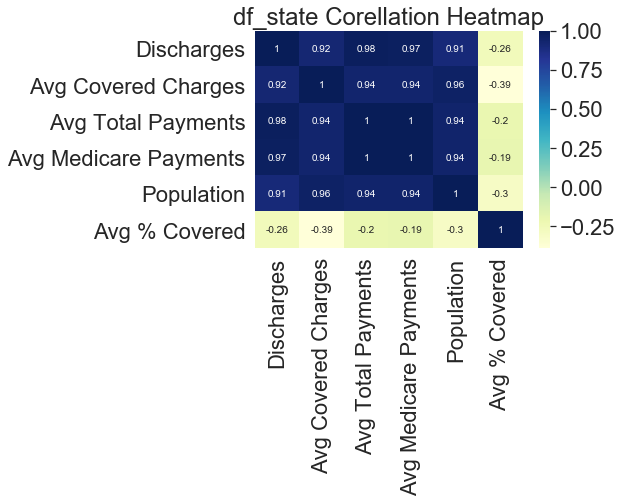

In [15]:
fig, ax = plt.subplots()
sns.heatmap(df_state.corr(), annot = True, cmap="YlGnBu", ax = ax)
ax.title.set_text('df_state Corellation Heatmap')

* Population is correlated to Total Discharges (0.91)
* Average Medicare Payments is highly correlated to Average Total Payments (0.99)
* There is a slight correlation between Population and Average Covered Charges (0.52)

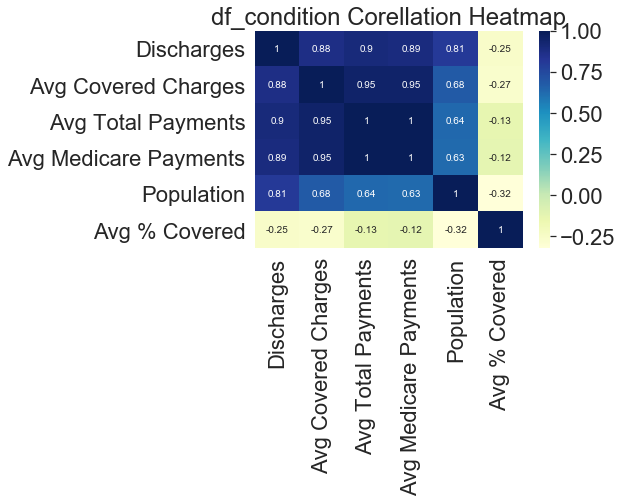

In [16]:
fig, ax = plt.subplots()
sns.heatmap(df_condition.corr(), annot = True, cmap="YlGnBu", ax = ax)
ax.title.set_text('df_condition Corellation Heatmap')

* There is a slight corellation between Population and Average Covered Charges (0.35) in this dataset as well

# Data Analysis & Results

In [17]:
df_state.shape

(51, 7)

In [18]:
df_condition.shape

(510, 8)

In [19]:
S_rows = df_state.isnull().any(axis=1)
df_state[S_rows].shape

(0, 7)

In [20]:
C_rows = df_condition.isnull().any(axis=1)
df_condition[C_rows].shape

(0, 8)

In [21]:
df_state.columns[df_state.isnull().any(axis=0)]

Index([], dtype='object')

In [22]:
df_condition.columns[df_condition.isnull().any(axis=0)]

Index([], dtype='object')

In [23]:
df_state.isnull().sum()

State                    0
Discharges               0
Avg Covered Charges      0
Avg Total Payments       0
Avg Medicare Payments    0
Population               0
Avg % Covered            0
dtype: int64

In [24]:
df_state.isnull().sum()

State                    0
Discharges               0
Avg Covered Charges      0
Avg Total Payments       0
Avg Medicare Payments    0
Population               0
Avg % Covered            0
dtype: int64

MEDIAA, MEAA, RANGE

In [25]:
df_state.median()

Discharges               9.625800e+04
Avg Covered Charges      2.763332e+09
Avg Total Payments       9.172638e+08
Avg Medicare Payments    7.799061e+08
Population               4.468402e+06
Avg % Covered            2.833274e-01
dtype: float64

In [26]:
df_condition.median()

Discharges               2.803000e+03
Avg Covered Charges      5.928080e+07
Avg Total Payments       1.920324e+07
Avg Medicare Payments    1.640383e+07
Population               4.468402e+06
Avg % Covered            2.801941e-01
dtype: float64

In [27]:
df_state.mean()

Discharges               1.367709e+05
Avg Covered Charges      4.823096e+09
Avg Total Payments       1.307637e+09
Avg Medicare Payments    1.136361e+09
Population               6.415048e+06
Avg % Covered            2.895403e-01
dtype: float64

In [28]:
df_condition.mean()

Discharges               4.426737e+03
Avg Covered Charges      1.471053e+08
Avg Total Payments       4.071712e+07
Avg Medicare Payments    3.523568e+07
Population               6.415048e+06
Avg % Covered            2.954297e-01
dtype: float64

In [29]:
s_max=df_state['Avg % Covered'].max()
s_min=df_state['Avg % Covered'].min()
s_range= s_max-s_min
print(s_max,'-',s_min,'=',s_range)

s_max1=df_state['Discharges'].max()
s_min1=df_state['Discharges'].min()
s_range1= s_max1-s_min1
print(s_max1,'-',s_min1,'=',s_range1)

0.8536372030272014 - 0.14338960302819403 = 0.7102475999990073
536859 - 6142 = 530717


IQR(interquartile Range)

In [30]:
low, up = np.percentile(df_state['Discharges'], [0,100])
low, up

(6142.0, 536859.0)

In [31]:
iqr = up - low
iqr

530717.0

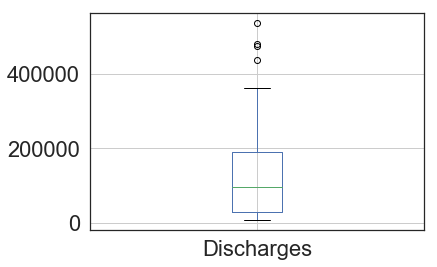

In [32]:
df_state.boxplot(column='Discharges');

We will now create linear models to see if the population of a state inflences the medicare coverage.

In [33]:
df_state.rename(columns={'Avg % Covered':'Covered'}, inplace=True)

pop_median = df_state.loc[:,'Population'].mean()
dis_median = df_state.loc[:,'Discharges'].mean()

def stand1(pop):
    
    if (pop <= pop_median):
        return 'low'
    else:
        return 'high'
    
def stand2(dis):
    
    if (dis <= dis_median):
        return 'low'
    else:
        return 'high'
    
df_state['Pop'] = df_state['Population'].apply(stand1)
df_state['Dis'] = df_state['Discharges'].apply(stand2)

The cell above calculates the mean populations and number of discharges. It then creates two new columns in df_state, which generalizes population and discharges into two categories based on their relation to the mean. Now we can create our OLS model to predict average percent covered from population.

In [34]:
outcome_1, predictors_1 = patsy.dmatrices('Covered ~ Pop',df_state)
mod_1 = sm.OLS(outcome_1,predictors_1)
res_1 = mod_1.fit()

print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Covered   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.646
Date:                Wed, 12 Jun 2019   Prob (F-statistic):             0.0621
Time:                        03:49:14   Log-Likelihood:                 43.610
No. Observations:                  51   AIC:                            -83.22
Df Residuals:                      49   BIC:                            -79.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2498      0.025      9.813      0.0

Based on the model above and using an alpha value of 0.01, population does not significantly predict average percent covered. We will create another OLS model to predict average percent covered from discharges.

In [35]:
outcome_2, predictors_2 = patsy.dmatrices('Covered ~ Dis',df_state)
mod_2 = sm.OLS(outcome_2,predictors_2)
res_2 = mod_2.fit()

print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Covered   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.1209
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.730
Time:                        03:49:14   Log-Likelihood:                 41.843
No. Observations:                  51   AIC:                            -79.69
Df Residuals:                      49   BIC:                            -75.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2827      0.025     11.338      0.0

Based on the model above and using an alpha value of 0.01, discharges do not significantly predict average percent covered. We will create a few more linear models to analyze each condition separately. First we will apply the same changes from above to generalize population and discharges. To save space, we will only print out the linear coefficients relating Population to Covered (the slope estimate) and the P-values resulting from each model.

In [36]:
df_condition.rename(columns={'Avg % Covered':'Covered'}, inplace=True)

df_condition['Pop'] = df_condition['Population'].apply(stand1)
df_condition['Dis'] = df_condition['Discharges'].apply(stand2)

for name in df_condition['DRG'].unique():
    outcome, predictors = patsy.dmatrices('Covered ~ Pop',
                    df_condition.loc[df_condition['DRG'] == name])
    mod = sm.OLS(outcome, predictors)
    res = mod.fit()
    
    print(name)
    print('\t Coefficient: ', res.params[1])
    print('\t P-value: ', res.f_pvalue)

190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC
	 Coefficient:  0.06906954524563157
	 P-value:  0.046391265602517294
194 - SIMPLE PNEUMONIA & PLEURISY W CC
	 Coefficient:  0.06751140214684292
	 P-value:  0.04404436370443962
291 - HEART FAILURE & SHOCK W MCC
	 Coefficient:  0.06194584190575887
	 P-value:  0.07907914786449713
292 - HEART FAILURE & SHOCK W CC
	 Coefficient:  0.06635917661454908
	 P-value:  0.047191210296787876
392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC
	 Coefficient:  0.05676146615886751
	 P-value:  0.0622940600940216
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC
	 Coefficient:  0.06738265368378277
	 P-value:  0.03044779325792945
641 - MISC DISORDERS OF NUTRITION,METABOLISM,FLUIDS/ELECTROLYTES W/O MCC
	 Coefficient:  0.06081117820428253
	 P-value:  0.043184867805011296
683 - RENAL FAILURE W CC
	 Coefficient:  0.06306959669948764
	 P-value:  0.06777661068272371
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC
	 Coefficient:  0.

There do not appear to be significant differences between any of the coefficients of the linear models. There are small differences in the P-values, but none are lower than 0.01, so we cannot conclude that population predicts average percent covered for any of these conditions.

# Ethics & Privacy

The stakeholders in the hypothesis we are investigating include insurance companies and people who receive Medicare. One possible effect of our results could be that insurance companies could use the data to charge higher prices in regions with higher populations, which they would profit from. This might harm people with lower incomes who live in areas with high populations.

The data we are using is collected from across over 3,000 U.S. hospitals that received Medicare payments, where the information is limited to the locations of the hospital and the provider and the amount covered. The data is likely not biased because data was collected from many hospitals in all 50 states, making it a comprehensive representation of all Medicare payments in the U.S. The patients’ data is kept anonymous. However, to further protect patients’ data, we drop all the columns in the data that we don’t need and only use the overall averages for each state and illness.

The second dataset involves population, birth rates, death rates, and incomes in each state. Compared to the first dataset, it has less personal information. Hence, it would allow us to analyze the data collected by each state’s government. It doesn’t target any specific class, race or gender. Indeed, there are still potential biases: in this case, we can't guarantee that each state government would report accurate population data. The accuracy of the estimated population could be affected by several factors: such as undocumented people, human trafficking, etc.

This may lead to potential biases because the dataset of the population can't and didn't include these marginalized groups of people into considerations. Hence, the dataset of population change may not fully reflect the real situation in each state. These issues are out of our capability to handle and can't be solved by us; therefore, we acknowledge these potential biases in the Ethics & Privacy section to present our thinking and concerns to these groups of people.


# Conclusion & Discussion

We started off by cleaning the data and adding columns for the population of each state and average percent covered by Medicare, along with narrowing the data down to the top 10 conditions. We then performed data exploration by looking at summaries of the data and visualizations. For the data exploration, we analyzed correlation using heatmaps to obtain the different correlations between the different attributes of our data. We wanted to focus on the correlation between population and total payments and between population and average covered payments. Based on the heatmaps from our two datasets, we obtained a correlation of 0.52 between population and average covered charges and a correlation of 0.35 between population and average covered charges. These correlations aren’t significant enough to determine a strong relationship between population and average covered charges. To analyze our data, we performed an OLS regression to see if population and Medicare were correlated.

Based on the results of the OLS regression, the P-values we got were not significant enough to give us a conclusive result about our analysis (assuming an alpha value of 0.01). The P-values we got from analyzing conditions separately were also not significant enough. Thus, we cannot conclude that the population of a state affects the average Medicare one receives.

For the limitations of the analysis, we only have access to the public dataset. In other words, we didn’t include information and data from private companies. Hence, our dataset resource is not comprehensive enough to show the relation between the state population and medical insurance. For further research, we would like to include more dataset both from private companies and public platforms. Our project could also analyze the datasets and information on a global scale, reaching out to the international communities to see what determines the Medicare amount received by people. 
